# Sklearn control overfit example
    - Use the California house database to show how to control overfit tuning the model parameters
    

In [1]:
from __future__ import print_function

from sklearn import __version__ as sklearn_version
print('Sklearn version:', sklearn_version)

Sklearn version: 0.18.1


# Load data

In [2]:
from sklearn import datasets
all_data = datasets.california_housing.fetch_california_housing()
print(all_data.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




In [3]:
# Randomize, separate train & test and normalize

from sklearn.utils import shuffle
X, y = shuffle(all_data.data, all_data.target, random_state=0)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Normalize the data
from sklearn.preprocessing import Normalizer
normal = Normalizer()
X_train = normal.fit_transform(X_train)
X_test = normal.transform(X_test)

In [4]:
# Create a basic decision tree
from sklearn import tree
from sklearn.metrics import mean_absolute_error

clf = tree.DecisionTreeRegressor()
clf.fit(X_train, y_train)
mean_absolute_error(y_test, clf.predict(X_test))

0.67617532119788626

In [5]:
# Define a function to evaluate the error over models with different max_depth
def acc(md):
    '''
    Calculate error of a tree with a specific mas_depth
    
    Paramters:
        md: max depth of the tree
    
    Returns:
        Mean absolute error of the fitted tree
    '''
    clf = tree.DecisionTreeRegressor(max_depth=md)
    clf.fit(X_train, y_train)
    return mean_absolute_error(y_test, clf.predict(X_test))


# Evaluate from max_depth=1 to max_depth=30
index = []
accuracy = []
for i in range(1,30):
    accuracy_step = acc(i)
    index += [i]
    accuracy += [accuracy_step]
    print('Max depth - Error:', i, accuracy_step)

Max depth - Error: 1 0.854671502458
Max depth - Error: 2 0.803669906473
Max depth - Error: 3 0.731437961421
Max depth - Error: 4 0.673408732764
Max depth - Error: 5 0.620992814672
Max depth - Error: 6 0.588647263782
Max depth - Error: 7 0.5672114724
Max depth - Error: 8 0.559015262244
Max depth - Error: 9 0.558211119911
Max depth - Error: 10 0.567756508267
Max depth - Error: 11 0.579294954959
Max depth - Error: 12 0.595862630172
Max depth - Error: 13 0.609429816931
Max depth - Error: 14 0.626967476117
Max depth - Error: 15 0.638572105918
Max depth - Error: 16 0.652977889407
Max depth - Error: 17 0.665057019316
Max depth - Error: 18 0.668535920896
Max depth - Error: 19 0.667117032995
Max depth - Error: 20 0.674268547971
Max depth - Error: 21 0.675524260708
Max depth - Error: 22 0.673072567181
Max depth - Error: 23 0.676908326771
Max depth - Error: 24 0.679728554113
Max depth - Error: 25 0.677460877612
Max depth - Error: 26 0.679109776531
Max depth - Error: 27 0.677973461636
Max depth - 

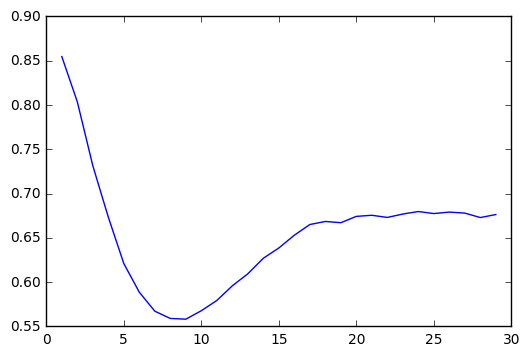

In [6]:
# Plot the error vs max_depth
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(index,accuracy)

## Fit the best model

In [7]:
clf = tree.DecisionTreeRegressor(max_depth=9)
clf.fit(X_train, y_train)
mean_absolute_error(y_test, clf.predict(X_test))

0.55897519667665163

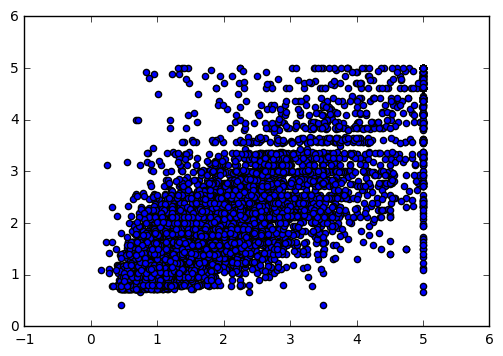

In [8]:
# Plot the sctterplot
plt.scatter(y_test, clf.predict(X_test))


## A better way. Use a model_selection tool: [RandomizedSeachCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

In [9]:
import numpy as np

from time import time
from scipy.stats import randint

from sklearn.model_selection import RandomizedSearchCV


# Define estimator. No parameters
clf = tree.DecisionTreeRegressor()


# specify parameters and distributions to sample from
param_dist = {"max_depth": randint(3, 20), 
              "min_samples_leaf": randint(5, 50)}


# Define randomized search
n_iter_search = 30
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search)


# Run the randomized search
start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings." % ((time() - start), n_iter_search))

RandomizedSearchCV took 4.67 seconds for 30 candidates parameter settings.


In [10]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidate = np.argmax(results['rank_test_score'] == i)
        print("Model with rank: ", i)
        print("Mean validation score: ", results['mean_test_score'][candidate])
        print("Parameters: ", results['params'][candidate], "\n")
            
report(random_search.cv_results_)       

Model with rank:  1
Mean validation score:  0.575561386216
Parameters:  {'max_depth': 14, 'min_samples_leaf': 28} 

Model with rank:  2
Mean validation score:  0.48729523555
Parameters:  {'max_depth': 5, 'min_samples_leaf': 25} 

Model with rank:  3
Mean validation score:  0.575004907588
Parameters:  {'max_depth': 18, 'min_samples_leaf': 35} 



0.540164857338


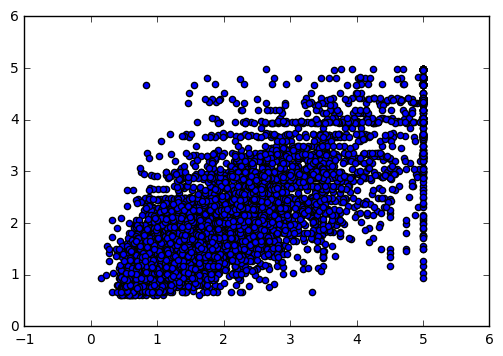

In [11]:
# Build the tree with the optimal parametrization
clf = tree.DecisionTreeRegressor(max_depth=15, min_samples_leaf=28)
clf.fit(X_train, y_train)
print(mean_absolute_error(y_test, clf.predict(X_test)))

plt.scatter(y_test, clf.predict(X_test))